<a href="https://colab.research.google.com/drive/1tLdKVWmicumI6X_f0UGI-cCW9ywMJmfK?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Install the ucimlrepo package
%pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\alexa\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
nursery = fetch_ucirepo(id=76)

# data (as pandas dataframes)
X = nursery.data.features
y = nursery.data.targets

# metadata
print(nursery.metadata)

# variable information
print(nursery.variables)

{'uci_id': 76, 'name': 'Nursery', 'repository_url': 'https://archive.ics.uci.edu/dataset/76/nursery', 'data_url': 'https://archive.ics.uci.edu/static/public/76/data.csv', 'abstract': ' Nursery Database was derived from a hierarchical decision model originally developed to rank applications for nursery schools.', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 12960, 'num_features': 8, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1989, 'last_updated': 'Sun Jan 14 2024', 'dataset_doi': '10.24432/C5P88W', 'creators': ['Vladislav Rajkovic'], 'intro_paper': {'ID': 372, 'type': 'NATIVE', 'title': 'An application for admission in public school systems', 'authors': 'M. Olave, V. Rajkovic, M. Bohanec', 'venue': 'Expert Systems in Public Administration', 'year': 1989, 'journal': None, 'DOI': None, 

In [40]:
#import pandas para manipulação e análise de dados
import pandas as pd

#carregando a base de dados Nursery
df_nursery = pd.read_csv('C:/Users/alexa/Downloads/UCL/8 Período/Inteligencia Artificial/Trabalho01IA/trabintelartificial/Nursery/nursery.data', header=None)

#Exibindo as primeiras linhas e a distribuição das classes para análise
print("Formato do dataset:", df_nursery.shape)
print("Exemplo de dados:")
print(df_nursery.head())

Formato do dataset: (12960, 9)
Exemplo de dados:
       0       1         2  3           4           5              6  \
0  usual  proper  complete  1  convenient  convenient        nonprob   
1  usual  proper  complete  1  convenient  convenient        nonprob   
2  usual  proper  complete  1  convenient  convenient        nonprob   
3  usual  proper  complete  1  convenient  convenient  slightly_prob   
4  usual  proper  complete  1  convenient  convenient  slightly_prob   

             7          8  
0  recommended  recommend  
1     priority   priority  
2    not_recom  not_recom  
3  recommended  recommend  
4     priority   priority  


In [36]:
#Import da função para dividir os dados em conjuntos de treino e teste
from sklearn.model_selection import train_test_split

#dividindo os dados
X = df_nursery.iloc[:, :-1]  #todas as colunas exceto a última
y = df_nursery.iloc[:, -1]   #ultima coluna para ser a classe

#selecionando as 10.000 amostras para o treinamento
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=10000, random_state=42)
print("Tamanho do conjunto de treinamento:", X_train.shape)
print("Tamanho do conjunto de teste:", X_test.shape)

Tamanho do conjunto de treinamento: (10000, 8)
Tamanho do conjunto de teste: (2960, 8)


In [38]:
df_nursery.head()

,0,1,2,3,4,5,6,7,8
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority


In [41]:
#import das funções para alteração em colunas binarias
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#aplicando o 'OneHotEncoding' as variáveis sem numeração
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(), X.columns)
])

X_train_enc = preprocessor.fit_transform(X_train)
X_test_enc = preprocessor.transform(X_test)

In [42]:
#import do classificador de árvore de decisão para criar e treinar o modelo
from sklearn.tree import DecisionTreeClassifier

#criando a árvore de decisão com critério de ganho de informação
clf = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)
clf.fit(X_train_enc, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

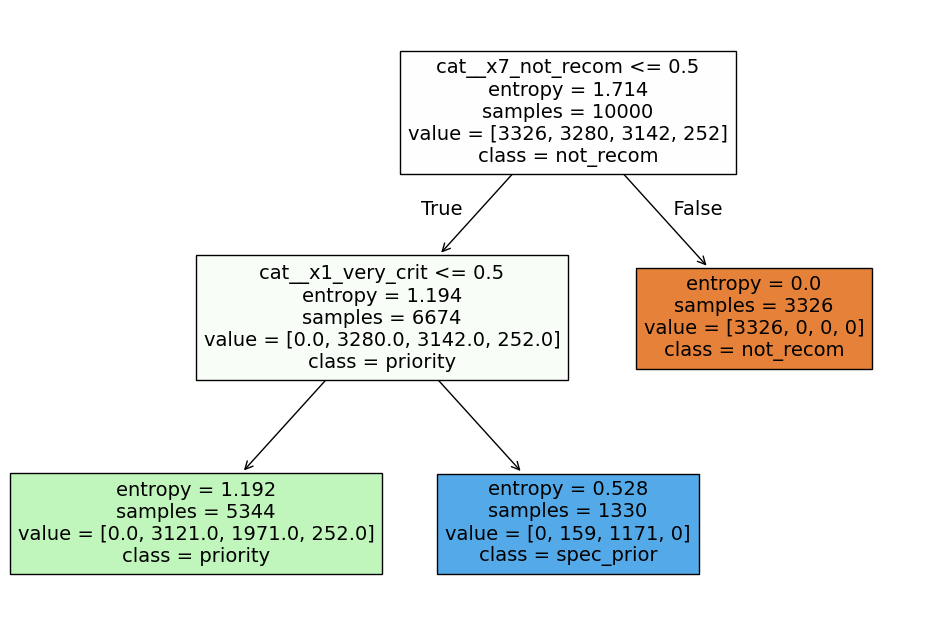

In [43]:
#visualizando a estrutura da árvore
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=preprocessor.get_feature_names_out(), class_names=clf.classes_, filled=True)
plt.show()

In [44]:
#import para verificar a acurácia
from sklearn.metrics import accuracy_score

#predições para calcular a acurácia
y_pred = clf.predict(X_test_enc)
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia da árvore de decisão no conjunto de teste:", accuracy)

Acurácia da árvore de decisão no conjunto de teste: 0.768918918918919


In [45]:
#Importando a função para exibir a árvore de decisão como texto, facilitando a visualização das regras de decisão
from sklearn.tree import export_text

#extraindo e exibindo as regras de decisão
rules = export_text(clf, feature_names=list(preprocessor.get_feature_names_out()))
print("Regras de decisão da árvore:\n", rules)

Regras de decisão da árvore:
 |--- cat__x7_not_recom <= 0.50
|   |--- cat__x1_very_crit <= 0.50
|   |   |--- class: priority
|   |--- cat__x1_very_crit >  0.50
|   |   |--- class: spec_prior
|--- cat__x7_not_recom >  0.50
|   |--- class: not_recom

